#### Content of Dataset :
Each row represents customer's account and each column represents customer's attributes descibed on the Metadata.

#### Dataset Information :
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

#### Objective 
We want to know the causes Customer Churn in a telcom company. These are a few question about hypotesis from the writer,
1. How the relationship between Customer Churn and Customer Account Information
2. What telco service that cause many Customer Churn?

In [1]:
# Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Read file
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Information of the data stucture
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


as seen Total Charges column are numerical value but has a dtype object, so we have to change it to numerical type

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # ‘coerce’ is for make an invalid parsing set as NaN.

In [7]:
#data['SeniorCitizen'].replace(to_replace=0, value='No', inplace=True)
#data['SeniorCitizen'].replace(to_replace=1,  value='Yes', inplace=True)

In [8]:
data = data.dropna()

In [9]:
# Function
def churn(data, option):
  '''
  this function is to call the data whether is Customer Churn or Not
  '''
  return data.loc[data['Churn']==option]

def visualize(data, column, hue=None, color=None):
    '''
    this funtion is to visualize the data, it divides to 2 type,
    for visualize categorical data and to visualize numerical data.
    '''
    sns.color_palette("flare")
    if data[column].dtypes=='O': 
        sns.set(rc={"figure.figsize":(8, 6)})
        ax = sns.countplot(x=column, 
                       data=data, 
                       hue=hue)
        for bar in ax.containers:
            ax.bar_label(bar,  
                     label_type='edge',
                     size = 10)
        print('Percentage :')
        percentage = data[column].value_counts()*100/len(data[column])
        return ax, round(percentage,2)
    else :
        ax = sns.kdeplot(x=column, 
                     data=data, 
                     color=color, 
                     fill = True)
        return ax

def pie(data, column, label= None, title=None):
    sns.color_palette("flare")
    sns.set(rc={"figure.figsize":(8, 6)})
    ax = (data[column].value_counts()*100.0 /len(data[column])).plot.pie(autopct='%.1f%%', labels = label)
    ax.set_title(title, fontsize = 12)
    return ax

def service_dominance(data, column):
    yes_val = []
    for col in column :
        if 'No' in data[col].unique() :
            if col == 'InternetService':
                data['InternetService'] = data['InternetService'].replace('No','Yes')
                yes_diff = data.loc[data[col]=='Yes'][col].value_counts()
                yes_sum = len(data[col])- yes_diff
                yes_perc = yes_sum*100/len(data[col])
                yes_val.append(yes_perc)
            else :
                yes_sum = data.loc[data[col]=='Yes'][col].value_counts()
                yes_perc = yes_sum*100/len(data[col])
                yes_val.append(yes_perc)
        else :
            pass 
    df = pd.DataFrame(yes_val)
    return df

def citizen(data,option):
    return data.loc[data['SeniorCitizen']==option]

def churn_rate(data0, data1, column):
    yes_val = []
    for col in column :
        if 'No' in data1[col].unique() :
            if col == 'InternetService':
                data1['InternetService'] = data1['InternetService'].replace('No','Yes')
                yes_diff = data1.loc[data1[col]=='Yes'][col].value_counts()
                yes_sum = len(data1[col])- yes_diff
                yes_perc = yes_sum*100/len(data0[col])
                yes_val.append(yes_perc)
            else :
                yes_sum = data1.loc[data1[col]=='Yes'][col].value_counts()
                yes_perc = yes_sum*100/len(data0[col])
                yes_val.append(yes_perc)
        else :
            pass 
    df = pd.DataFrame(yes_val)
    return df


#### 1. Customer Churn from Account Information

We take a sample column that represent account information
- Tenure
- Contract
- MonthlyCharges

<Axes: xlabel='tenure', ylabel='Density'>

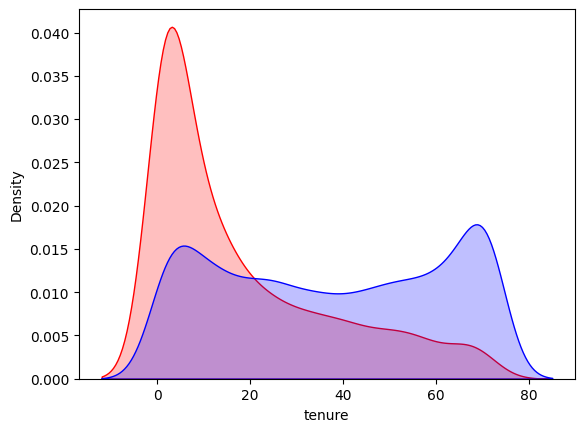

In [10]:
# Tenure
visualize(churn(data,'Yes'),'tenure',color='Red')
visualize(churn(data,'No'),'tenure',color='Blue')

In [11]:
churn(data,'Yes')['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

We see that Customer Churn mostly in early tenure

Percentage :


(<Axes: xlabel='Contract', ylabel='count'>,
 Month-to-month    88.55
 One year           8.88
 Two year           2.57
 Name: Contract, dtype: float64)

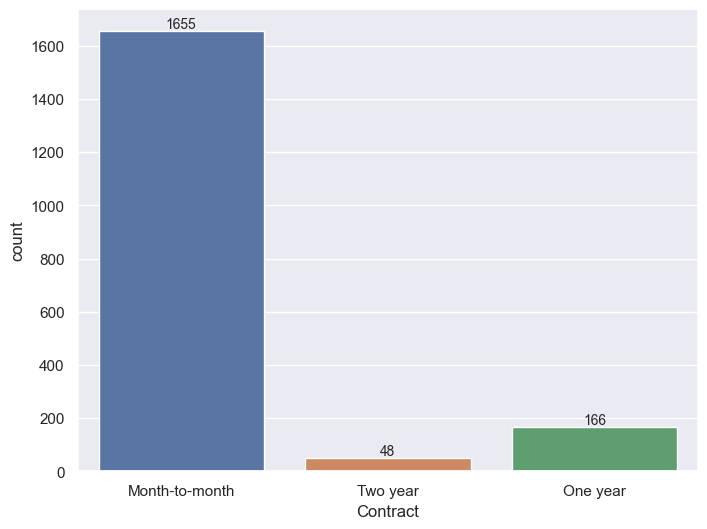

In [12]:
# Contract
visualize(churn(data,'Yes'),'Contract')

as seen, Customer tend to Churn if the subscription or contract is month-to-month

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

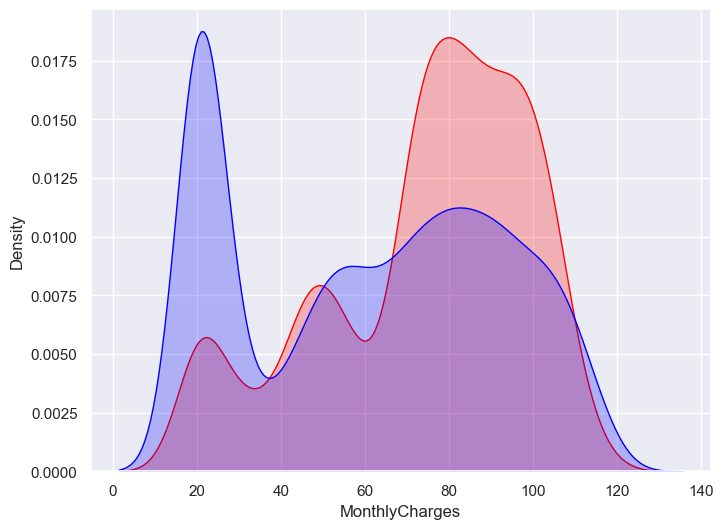

In [13]:
# MonthlyCharges
visualize(churn(data,'Yes'),'MonthlyCharges',color='Red')
visualize(churn(data,'No'),'MonthlyCharges',color='Blue')

as seen if the monthly charges is relative cheap, Customer tend to not Churn. Meanwhile if the montly charges is relative expensive, Customer tend to Churn.

#### 2. Customer Churn from Telco Service
First, we want to check, what telco service that mostly used by customer but the customer tend to churn

We take a sample column that represent service provided by telco company
- PhoneService
- InternetService
- MultipleLines
- StreamingMovies
- StreamingTV


In [14]:
service_dominance(churn(data,'Yes'),['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']).sort_values('Yes',ascending=False)

C:\Users\AZKA FACHRIZAL\AppData\Local\Temp\ipykernel_24848\1009167753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InternetService'] = data['InternetService'].replace('No','Yes')


,Yes
InternetService,93.953986
PhoneService,90.904227
MultipleLines,45.478866
StreamingMovies,43.766720
StreamingTV,43.552702
DeviceProtection,29.159979
OnlineBackup,27.982879
TechSupport,16.586410
OnlineSecurity,15.783842


Percentage :


(<Axes: xlabel='PhoneService', ylabel='count'>,
 Yes    90.9
 No      9.1
 Name: PhoneService, dtype: float64)

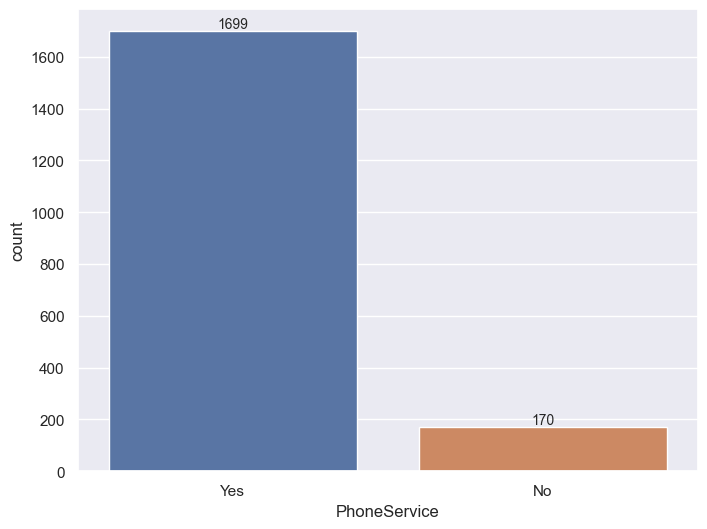

In [15]:
# PhoneService
visualize(churn(data,'Yes'),'PhoneService')

this is really interesting because the difference between user phone service is significant. Many customer that used phone service tend to churn.

Percentage :


(<Axes: xlabel='InternetService', ylabel='count'>,
 Fiber optic    69.40
 DSL            24.56
 No              6.05
 Name: InternetService, dtype: float64)

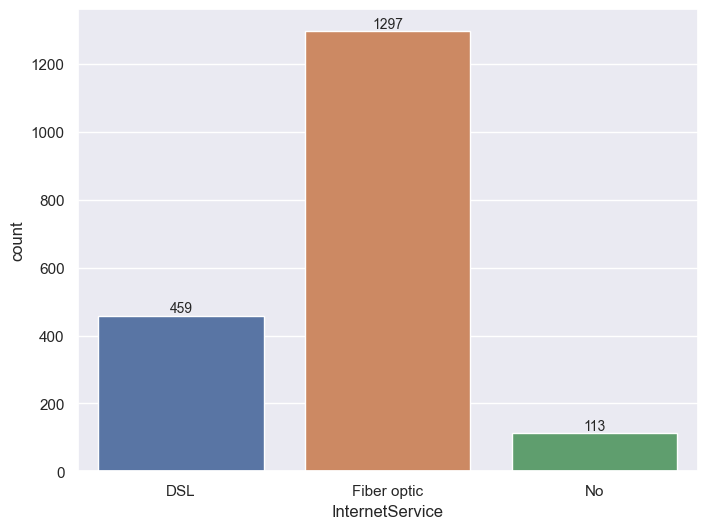

In [16]:
# InternetService
visualize(churn(data,'Yes'),'InternetService')

Percentage :


(<Axes: xlabel='MultipleLines', ylabel='count'>,
 Yes                 45.48
 No                  45.43
 No phone service     9.10
 Name: MultipleLines, dtype: float64)

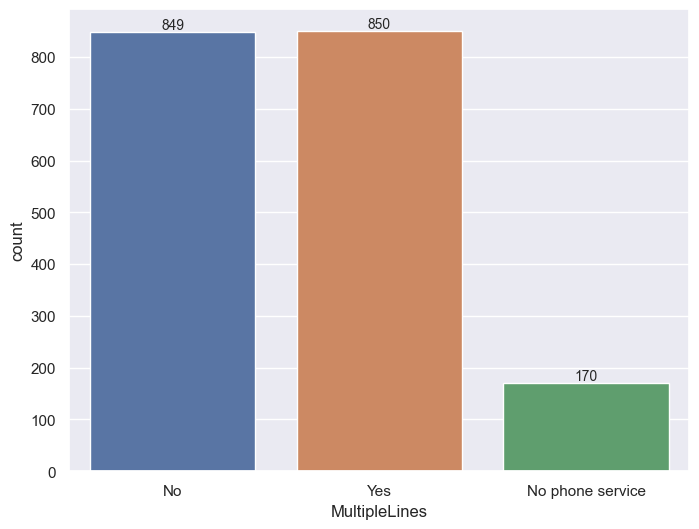

In [17]:
# MultipleLines
visualize(churn(data,'Yes'),'MultipleLines')

Percentage :


(<Axes: xlabel='StreamingMovies', ylabel='count'>,
 No                     50.19
 Yes                    43.77
 No internet service     6.05
 Name: StreamingMovies, dtype: float64)

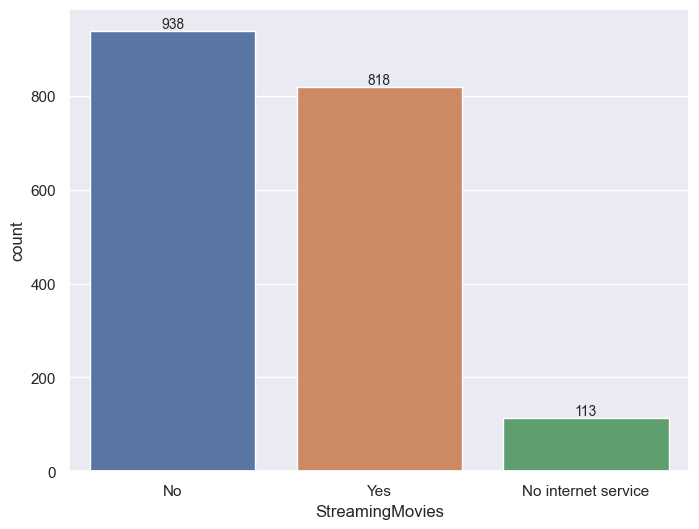

In [18]:
# Streaming Movie
visualize(churn(data,'Yes'),'StreamingMovies')

Percentage :


(<Axes: xlabel='StreamingTV', ylabel='count'>,
 No                     50.40
 Yes                    43.55
 No internet service     6.05
 Name: StreamingTV, dtype: float64)

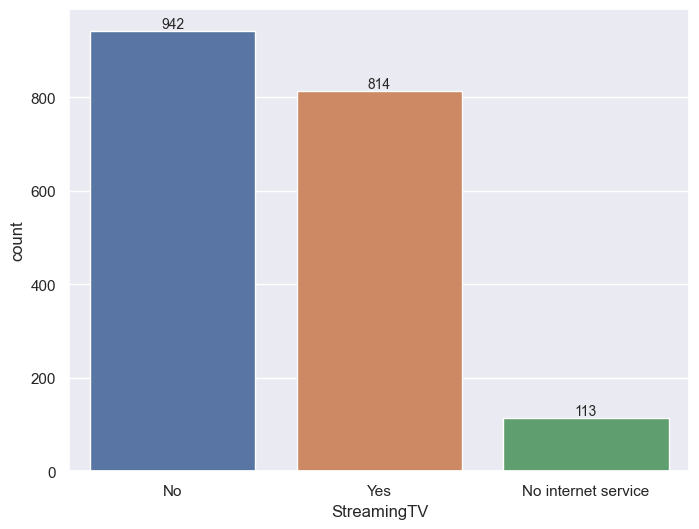

In [19]:
# Streaming TV
visualize(churn(data,'Yes'),'StreamingTV')

here are some points,
- Many customer that used Phone Service tend to Churn
- For Internet Service, we know that fiber optic is the latest technology, but as we can see, many customer that used fiber optic technolgy tend to Churn

also, the service that used by customer then cause Customer Churn is 
- InternetService	93.95% 
- PhoneService	90.90% 
- MultipleLines	45.47% 
- StreamingMovies	43.76% 
- StreamingTV 43.55%

##### Telco service that causes Customer Churn from the non-Senior Citizen perspective.

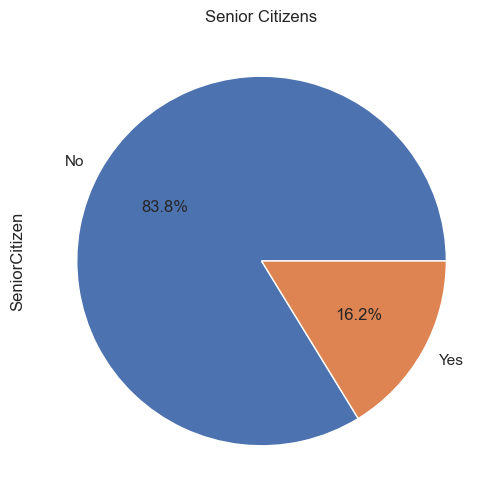

In [20]:
pie(data,'SeniorCitizen',["No","Yes"],'Senior Citizens')
plt.savefig('Pie')

In [21]:
# Total Cust
data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
# Total Cust Churn
churn(data,'Yes')['SeniorCitizen'].value_counts()*100/len(data['SeniorCitizen'])

0    19.809443
1     6.769056
Name: SeniorCitizen, dtype: float64

Percentage :


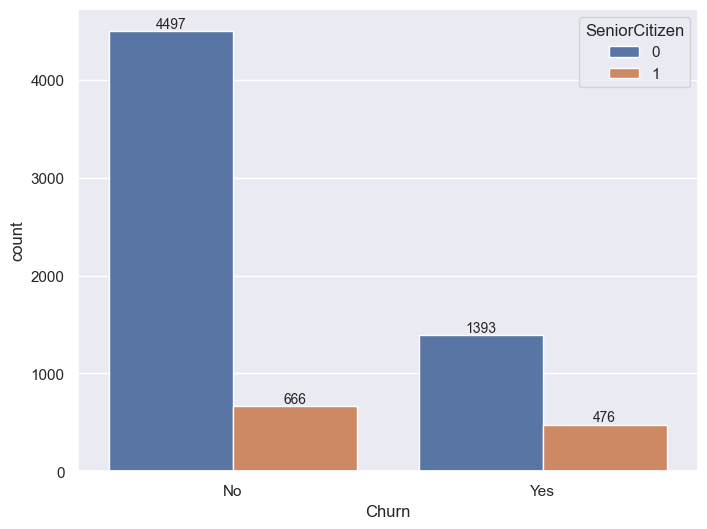

In [23]:
visualize(data,'Churn',hue='SeniorCitizen')
plt.savefig('HueChurnCitizen.png')

In [24]:
service_dominance(citizen(churn(data,'Yes'),0),['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']).sort_values('Yes', ascending=False)

,Yes
InternetService,92.246949
PhoneService,90.954774
StreamingTV,41.995693
StreamingMovies,41.206030
MultipleLines,40.918880
DeviceProtection,28.284279
OnlineBackup,26.992103
TechSupport,18.592965
OnlineSecurity,16.582915


Percentage :


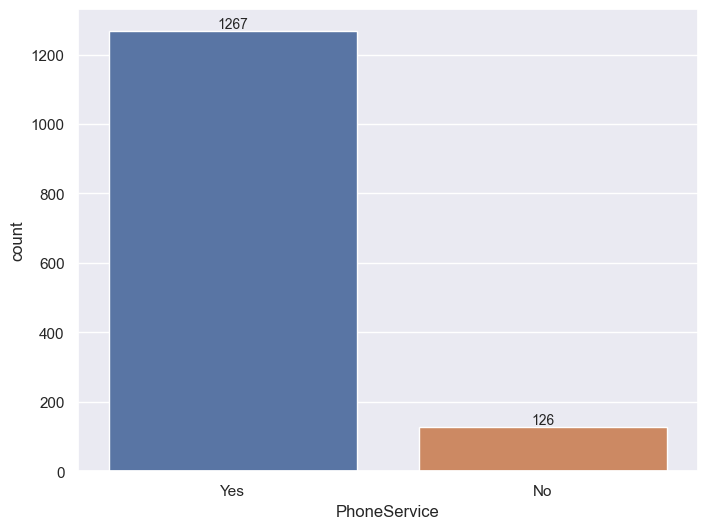

In [25]:
# PhoneService
visualize(citizen(churn(data,'Yes'),0),'PhoneService')
plt.savefig('phoneservice.png')

Percentage :


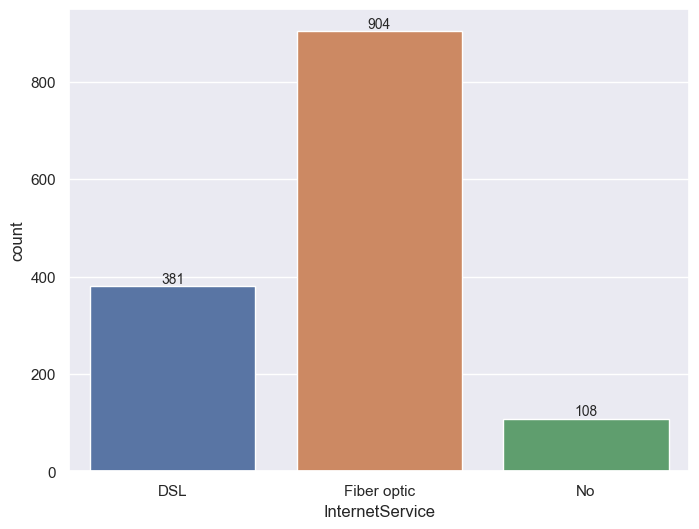

In [26]:
# InternetService
visualize(citizen(churn(data,'Yes'),0),'InternetService')
plt.savefig('internetservice.png')

In [27]:
['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [28]:
citizen(churn(data,'Yes'),0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [29]:
churnrate = churn_rate(data,citizen(churn(data,'Yes'),0),['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']).sort_values('Yes', ascending=False)
churnrate.columns = ['ChurnRate']

In [30]:
churnrate

,ChurnRate
InternetService,18.273606
PhoneService,18.017634
StreamingTV,8.319113
StreamingMovies,8.162685
MultipleLines,8.105802
DeviceProtection,5.602958
OnlineBackup,5.346985
TechSupport,3.683163
OnlineSecurity,3.284983


Percentage :


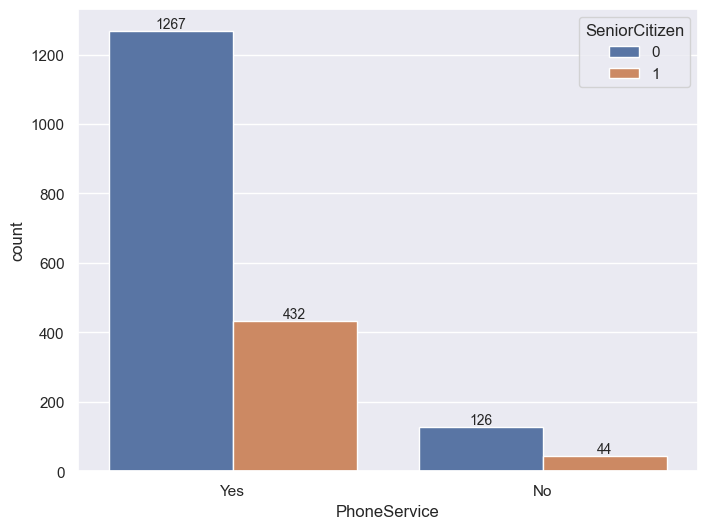

In [31]:
visualize(churn(data,'Yes'),'PhoneService',hue='SeniorCitizen')
plt.savefig('Phonehue.png')

Percentage :


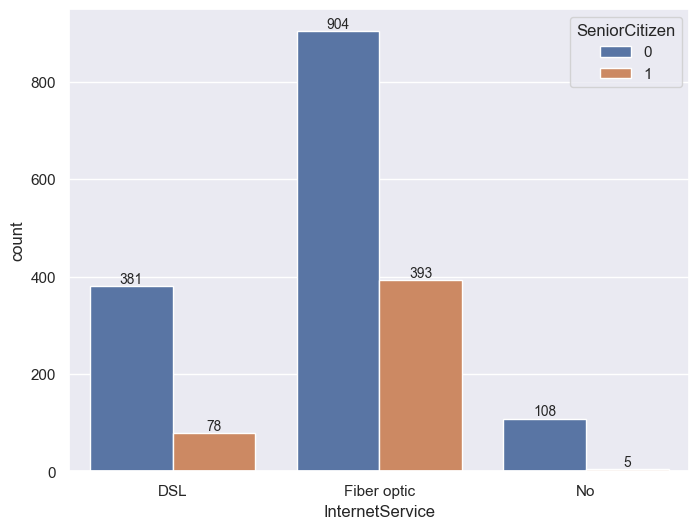

In [32]:
visualize(churn(data,'Yes'),'InternetService',hue='SeniorCitizen')
plt.savefig('Internethue.png')

In [33]:
churn(data,'Yes')['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [34]:
service_dominance(data,['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']).sort_values('Yes',ascending=False)

,Yes
PhoneService,90.329920
InternetService,78.384528
MultipleLines,42.192833
StreamingMovies,38.836746
StreamingTV,38.438567
OnlineBackup,34.485210
DeviceProtection,34.385666
TechSupport,29.010239
OnlineSecurity,28.654721
